<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/allARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving final odessy_ our detrended data - detrended_final (11) (1).csv to final odessy_ our detrended data - detrended_final (11) (1).csv


In [ ]:
columns =    ["date", "compound_detrended", "compound",
              "VCDAX_V_detrended", "VCDAX_V_N", "VCSAX_V_detrended",
              "VCSAX_V_N", "VENAX_V_detrended", "VENAX_V_N",
              "VFAIX_V_detrended", "VFAIX_V_N", "VGSLX_V_detrended",
              "VGSLX_V_N", "VGHCX_V_detrended", "VGHCX_V_N",
              "VITAX_V_detrended", "VITAX_V_N",
              "VSPVX_V_detrended", "VSPVX_V_N", "VTCAX_V_detrended",
              "VTCAX_V_N", "VUIAX_V_detrended", "VUIAX_V_N",
              "VINAX_V_detrended", "VINAX_V_N", "VUIAX_P_detrended",
              "VUIAX_P_N", "VGHCX_P_detrended", "VGHCX_P_N",
              "VFAIX_P_detrended", "VFAIX_P_N", "VSPVX_P_detrended",
              "VSPVX_P_N", "VITAX_P_detrended", "VITAX_P_N",
               "VGSLX_P_detrended", "VGSLX_P_N",
              "VINAX_P_detrended", "VINAX_P_N", "VTCAX_P_detrended",
              "VTCAX_P_N", "VCSAX_P_detrended", "VCSAX_P_N",
              "VENAX_P_detrended", "VENAX_P_N", "VCDAX_P_detrended",
              "VCDAX_P_N" ]

columns_important_V = ["VCDAX_V_N", "VCSAX_V_N","VENAX_V_N", "VFAIX_V_N",
                       "VGSLX_V_N", "VGHCX_V_N", "VITAX_V_N", "VSPVX_V_N",
                      "VTCAX_V_N", "VUIAX_V_N", "VINAX_V_N"]
columns_important_P = ["compound", "VUIAX_P_N", "VGHCX_P_N", "VFAIX_P_N", "VSPVX_P_N",
                       "VITAX_P_N", "VGSLX_P_N","VINAX_P_N", "VTCAX_P_N",
                       "VCSAX_P_N", "VENAX_P_N", "VCDAX_P_N"]
columns_affected_all = columns_important_P + columns_important_V

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date', inplace = True)

data_affected = data[columns_affected_all]
data_detrended = pd.DataFrame(index=data_affected.index)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-15-fe7cd702419c>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<ipython-input-16-7b2f0232ae82>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1871.627
Date:                Fri, 14 Jul 2023   AIC                           3755.254
Time:                        15:48:00   BIC                           3789.379
Sample:                             0   HQIC                          3767.729
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7503      0.020    -37.382      0.000      -0.790      -0.711
ar.L2         -0.5834      0.025    -23.807      0.000      -0.631      -0.535
ar.L3         -0.4138      0.026    -15.788      0.0

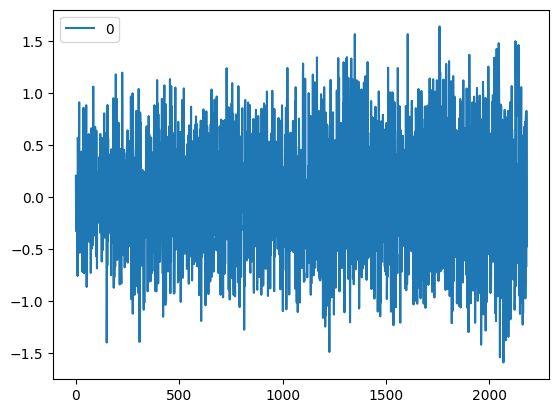

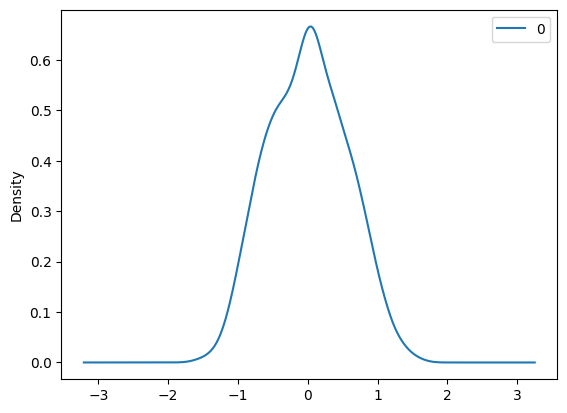

                 0
count  2182.000000
mean     -0.000276
std       0.570681
min      -1.592573
25%      -0.431627
50%       0.004258
75%       0.402328
max       1.636721
predicted=-0.012206, expected=-0.542300
predicted=-0.110631, expected=0.637800
predicted=0.043039, expected=0.000000
predicted=-0.035538, expected=0.296000
predicted=0.176271, expected=-0.817600
predicted=-0.155894, expected=-0.750600
predicted=-0.261767, expected=-0.278200
predicted=-0.174656, expected=0.000000
predicted=-0.236615, expected=0.361200
predicted=-0.102410, expected=0.750600
predicted=-0.034947, expected=-0.381800
predicted=-0.099123, expected=-0.585900
predicted=-0.071911, expected=0.000000
predicted=-0.013291, expected=-0.153100
predicted=-0.029012, expected=0.273200
predicted=0.066021, expected=0.000000
predicted=-0.135448, expected=0.318200
predicted=0.006374, expected=0.025800
predicted=0.062685, expected=0.796400
predicted=0.270793, expected=0.025800
predicted=0.207889, expected=-0.880700
predicted

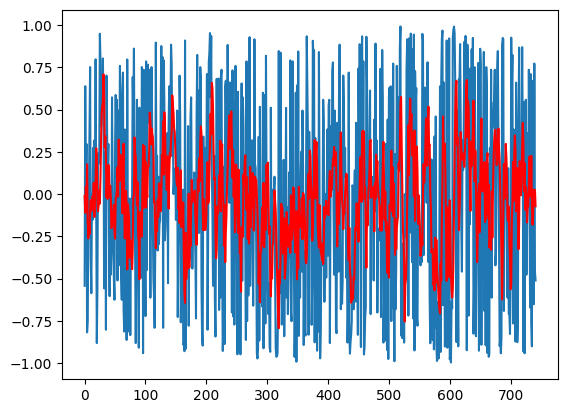

ARIMA Equation for compound: y(t) = -0.7507 + (-0.7507 * y(t-1)) + (-0.5832 * y(t-2)) + (-0.4141 * y(t-3)) + (-0.2963 * y(t-4)) + (-0.1543 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0054
Degree-1 Coefficient: -0.0448
Degree-2 Coefficient: 0.1089
Degree-3 Coefficient: -0.2115
Degree-4 Coefficient: -0.1543
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1312.103
Date:                Fri, 14 Jul 2023   AIC                           2636.206
Time:                        15:52:11   BIC                           2670.331
Sample:                             0   HQIC                          2648.681
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err

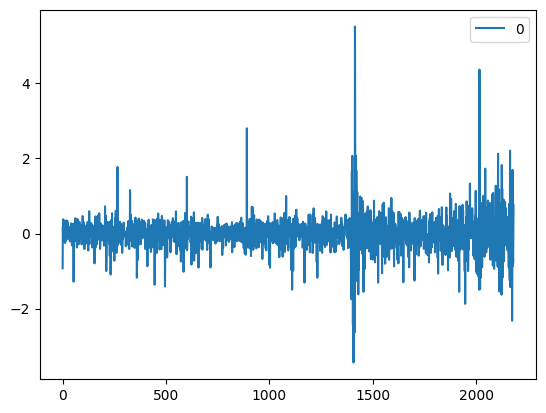

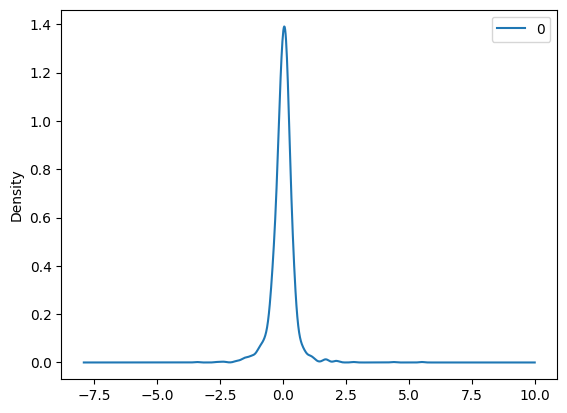

                 0
count  2182.000000
mean     -0.000603
std       0.442049
min      -3.433461
25%      -0.181490
50%       0.021416
75%       0.197154
max       5.511261
predicted=-0.333505, expected=-0.817891
predicted=-0.828249, expected=-0.612503
predicted=-0.496338, expected=-0.908401
predicted=-1.006080, expected=-0.588859
predicted=-0.591244, expected=0.013588
predicted=-0.026157, expected=0.879085
predicted=0.835862, expected=1.104326
predicted=1.082073, expected=1.428832
predicted=1.431156, expected=1.609404
predicted=1.537978, expected=2.053027
predicted=2.003742, expected=1.429556
predicted=1.401237, expected=1.912884
predicted=1.956722, expected=2.783345
predicted=2.659510, expected=2.055646
predicted=2.039968, expected=1.824270
predicted=1.969213, expected=0.396756
predicted=0.338697, expected=0.587254
predicted=0.652454, expected=0.752937
predicted=0.678386, expected=0.596009
predicted=0.659247, expected=0.578052
predicted=0.662950, expected=-0.313434
predicted=-0.316743,

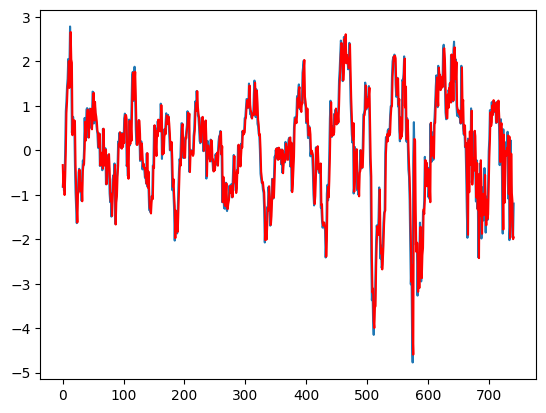

ARIMA Equation for VUIAX_P_N: y(t) = -0.0962 + (-0.0962 * y(t-1)) + (-0.0766 * y(t-2)) + (0.0485 * y(t-3)) + (-0.0305 * y(t-4)) + (-0.0345 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0245
Degree-1 Coefficient: -0.1936
Degree-2 Coefficient: 0.4466
Degree-3 Coefficient: -0.2735
Degree-4 Coefficient: -0.0345
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1187.041
Date:                Fri, 14 Jul 2023   AIC                           2386.083
Time:                        15:57:31   BIC                           2420.208
Sample:                             0   HQIC                          2398.558
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err

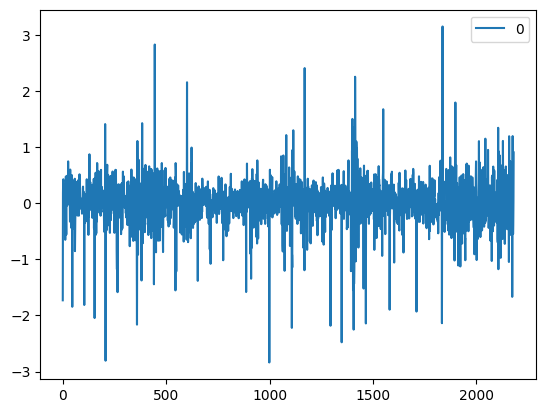

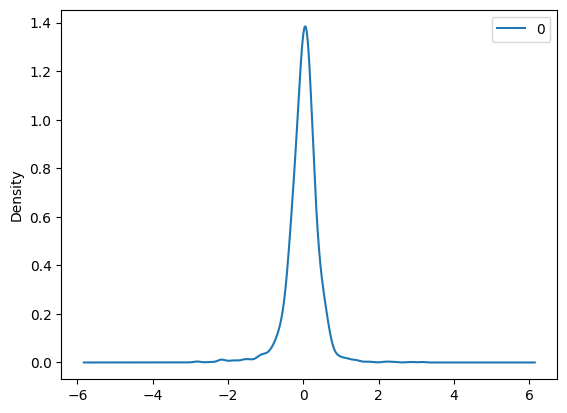

                 0
count  2182.000000
mean      0.000192
std       0.418639
min      -2.837174
25%      -0.177354
50%       0.019816
75%       0.198176
max       3.148560
predicted=0.563746, expected=0.201916
predicted=0.189764, expected=0.532794
predicted=0.567498, expected=0.326612
predicted=0.288892, expected=0.390485
predicted=0.391008, expected=0.642025
predicted=0.645693, expected=1.082755
predicted=1.074485, expected=1.517383
predicted=1.518537, expected=1.337139
predicted=1.317719, expected=1.449836
predicted=1.447423, expected=1.351981
predicted=1.318949, expected=0.988647
predicted=0.976905, expected=1.337834
predicted=1.358823, expected=1.490200
predicted=1.472122, expected=1.241297
predicted=1.248906, expected=1.204472
predicted=1.220416, expected=-0.316897
predicted=-0.359596, expected=0.084164
predicted=0.144827, expected=0.823940
predicted=0.804039, expected=0.935111
predicted=0.952196, expected=0.809793
predicted=0.851849, expected=1.284090
predicted=1.267239, expected=

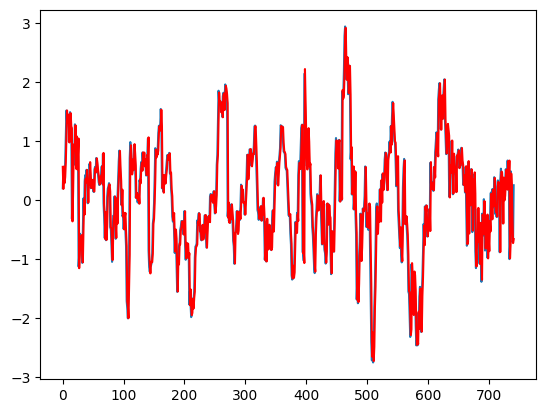

ARIMA Equation for VGHCX_P_N: y(t) = -0.0242 + (-0.0242 * y(t-1)) + (-0.0450 * y(t-2)) + (-0.0072 * y(t-3)) + (-0.0388 * y(t-4)) + (-0.0066 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0109
Degree-1 Coefficient: -0.0874
Degree-2 Coefficient: 0.2181
Degree-3 Coefficient: -0.1737
Degree-4 Coefficient: -0.0066
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1247.180
Date:                Fri, 14 Jul 2023   AIC                           2506.361
Time:                        16:02:04   BIC                           2540.486
Sample:                             0   HQIC                          2518.836
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std er

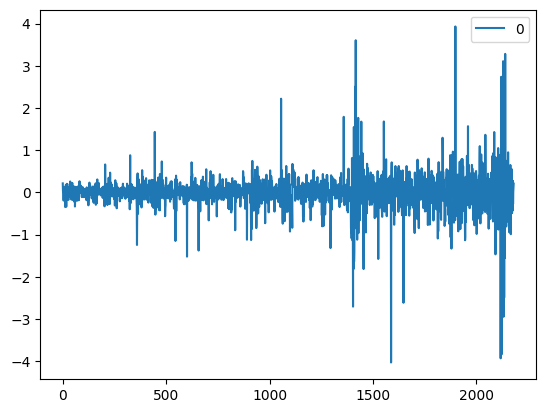

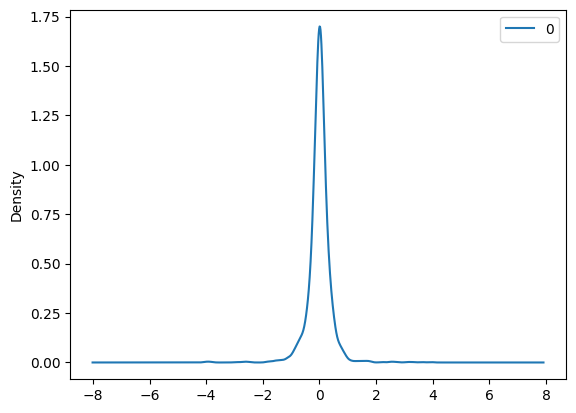

                 0
count  2182.000000
mean     -0.000108
std       0.428674
min      -4.030004
25%      -0.143065
50%       0.010635
75%       0.154818
max       3.930345
predicted=-0.661780, expected=-0.939607
predicted=-0.763159, expected=-0.499833
predicted=-0.320080, expected=-0.552228
predicted=-0.680226, expected=-0.611098
predicted=-0.572765, expected=1.110902
predicted=0.967678, expected=0.754141
predicted=0.754809, expected=0.488042
predicted=0.886921, expected=0.707635
predicted=0.597247, expected=0.849518
predicted=0.678165, expected=1.593658
predicted=1.591803, expected=2.001052
predicted=2.006111, expected=2.777572
predicted=2.857849, expected=3.197918
predicted=3.240308, expected=2.737542
predicted=2.899602, expected=1.914517
predicted=2.032344, expected=0.275529
predicted=0.226351, expected=1.097380
predicted=0.852413, expected=1.407635
predicted=1.108492, expected=1.102681
predicted=1.375479, expected=1.095618
predicted=1.226990, expected=0.732381
predicted=0.653109, ex

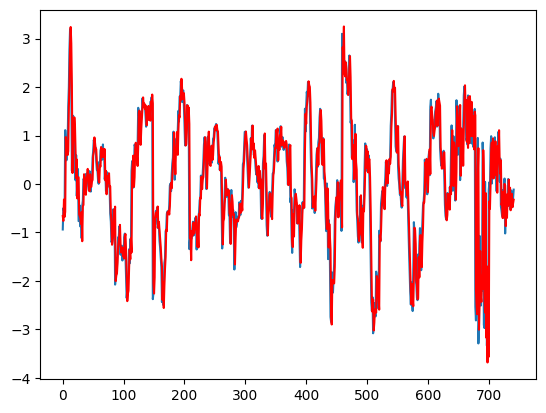

ARIMA Equation for VFAIX_P_N: y(t) = -0.1167 + (-0.1167 * y(t-1)) + (-0.1422 * y(t-2)) + (0.0569 * y(t-3)) + (-0.0114 * y(t-4)) + (0.0017 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0350
Degree-1 Coefficient: -0.2683
Degree-2 Coefficient: 0.6005
Degree-3 Coefficient: -0.3802
Degree-4 Coefficient: 0.0017
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1032.966
Date:                Fri, 14 Jul 2023   AIC                           2077.932
Time:                        16:07:08   BIC                           2112.058
Sample:                             0   HQIC                          2090.408
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err  

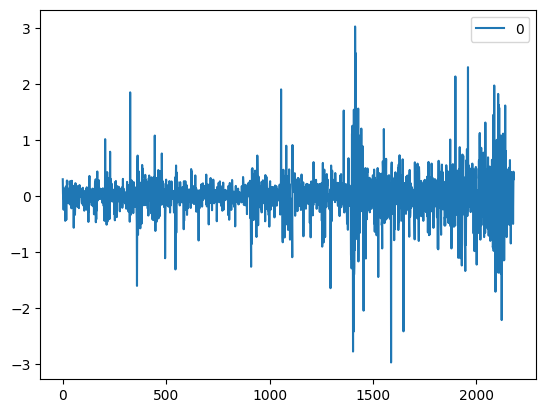

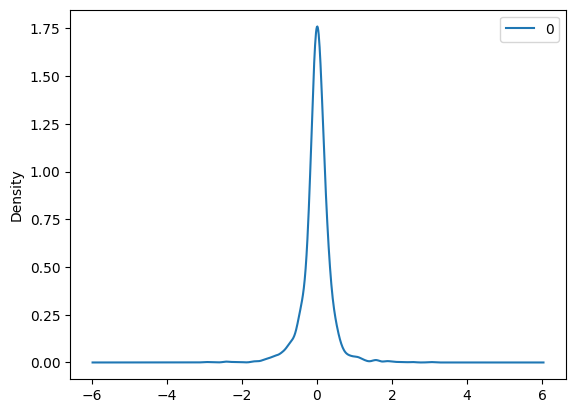

                 0
count  2182.000000
mean      0.000040
std       0.388604
min      -2.972702
25%      -0.133470
50%       0.009108
75%       0.153848
max       3.032530
predicted=-0.250672, expected=-0.498531
predicted=-0.348108, expected=-0.123027
predicted=0.097758, expected=-0.299201
predicted=-0.418041, expected=-0.293452
predicted=-0.300593, expected=0.988129
predicted=0.899500, expected=0.849757
predicted=0.837720, expected=0.862595
predicted=1.122135, expected=0.930955
predicted=0.874872, expected=1.198959
predicted=1.095699, expected=1.743393
predicted=1.732241, expected=1.851917
predicted=1.895389, expected=2.709403
predicted=2.754734, expected=3.255018
predicted=3.222606, expected=2.664198
predicted=2.828996, expected=2.061565
predicted=2.175354, expected=0.152386
predicted=0.045918, expected=0.803140
predicted=0.632515, expected=1.287326
predicted=0.977502, expected=1.004832
predicted=1.232275, expected=0.763685
predicted=0.963611, expected=0.732813
predicted=0.635256, exp

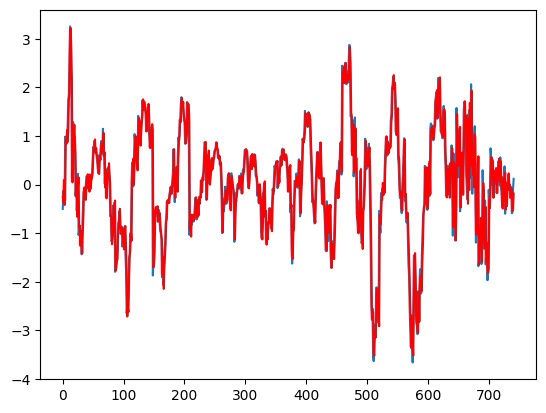

ARIMA Equation for VSPVX_P_N: y(t) = -0.1007 + (-0.1007 * y(t-1)) + (-0.0849 * y(t-2)) + (0.0941 * y(t-3)) + (-0.0299 * y(t-4)) + (0.0104 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0389
Degree-1 Coefficient: -0.3114
Degree-2 Coefficient: 0.7440
Degree-3 Coefficient: -0.5118
Degree-4 Coefficient: 0.0104
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1486.257
Date:                Fri, 14 Jul 2023   AIC                           2984.515
Time:                        16:12:41   BIC                           3018.640
Sample:                             0   HQIC                          2996.990
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err  

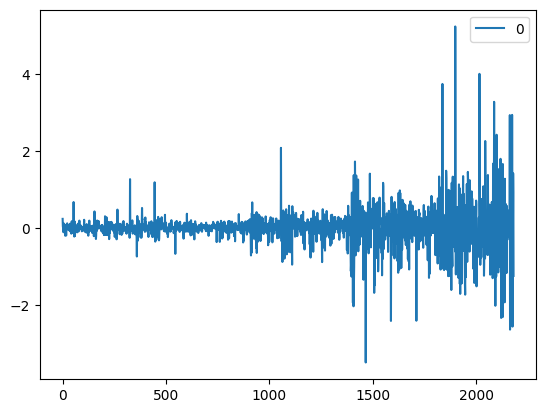

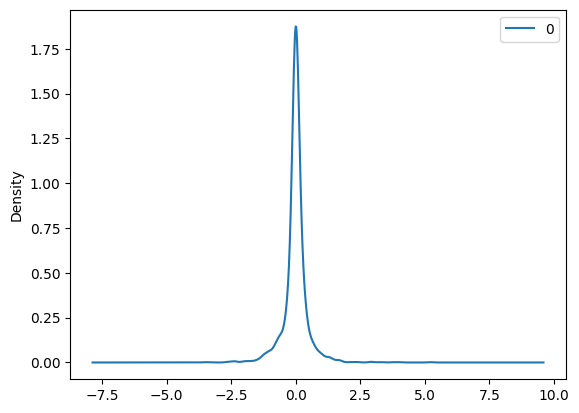

                 0
count  2182.000000
mean      0.000649
std       0.478334
min      -3.498422
25%      -0.106225
50%       0.008264
75%       0.129135
max       5.230552
predicted=0.123118, expected=0.172474
predicted=0.254846, expected=0.661267
predicted=0.676687, expected=0.344353
predicted=0.294256, expected=0.461011
predicted=0.456713, expected=0.584690
predicted=0.504038, expected=0.515281
predicted=0.518520, expected=0.798698
predicted=0.789702, expected=0.850408
predicted=0.810459, expected=1.047812
predicted=1.043336, expected=1.266281
predicted=1.220596, expected=1.003782
predicted=1.026359, expected=1.585609
predicted=1.517453, expected=1.705778
predicted=1.617157, expected=1.755733
predicted=1.807051, expected=2.105853
predicted=2.045226, expected=0.647958
predicted=0.792701, expected=1.217498
predicted=1.198175, expected=1.716823
predicted=1.449563, expected=1.703585
predicted=1.839202, expected=1.816732
predicted=1.894752, expected=2.035201
predicted=1.921120, expected=1.

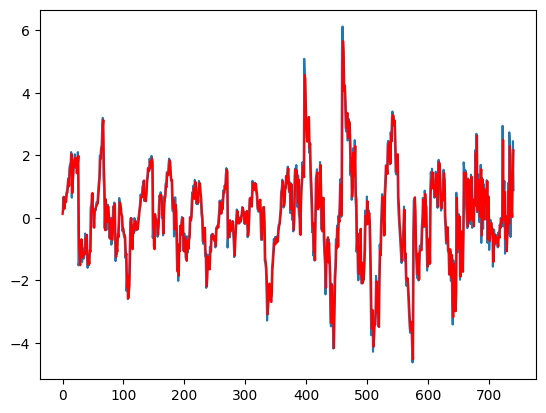

ARIMA Equation for VITAX_P_N: y(t) = -0.1791 + (-0.1791 * y(t-1)) + (-0.1093 * y(t-2)) + (0.0112 * y(t-3)) + (-0.0802 * y(t-4)) + (-0.0298 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0257
Degree-1 Coefficient: -0.2131
Degree-2 Coefficient: 0.5303
Degree-3 Coefficient: -0.3934
Degree-4 Coefficient: -0.0298
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1251.271
Date:                Fri, 14 Jul 2023   AIC                           2514.542
Time:                        16:17:25   BIC                           2548.667
Sample:                             0   HQIC                          2527.017
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err

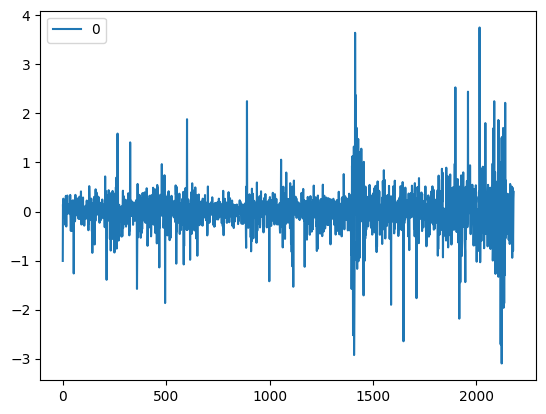

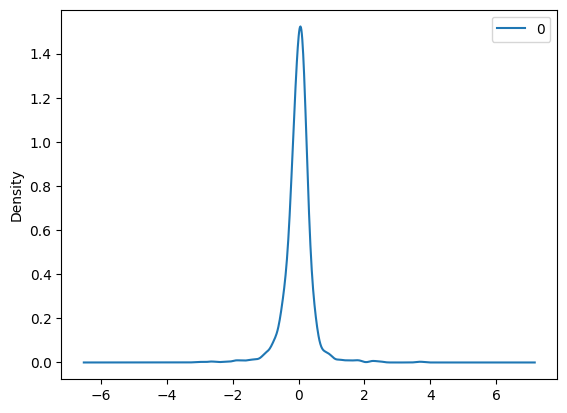

                 0
count  2182.000000
mean     -0.000160
std       0.429996
min      -3.097597
25%      -0.162043
50%       0.027258
75%       0.182177
max       3.751401
predicted=-0.952051, expected=-1.200437
predicted=-1.066947, expected=-0.999758
predicted=-0.765964, expected=-1.011058
predicted=-1.173642, expected=-0.700150
predicted=-0.762055, expected=0.590096
predicted=0.538998, expected=0.693265
predicted=0.690117, expected=0.446670
predicted=0.640952, expected=0.975915
predicted=0.842422, expected=1.153276
predicted=0.972168, expected=1.934775
predicted=2.003536, expected=1.692419
predicted=1.684710, expected=2.598985
predicted=2.644214, expected=3.234219
predicted=3.071802, expected=2.809563
predicted=2.922140, expected=2.139011
predicted=2.227066, expected=0.546354
predicted=0.409426, expected=1.709414
predicted=1.595477, expected=2.204743
predicted=1.983728, expected=1.828841
predicted=2.189735, expected=1.224002
predicted=1.349760, expected=1.176667
predicted=1.031524, ex

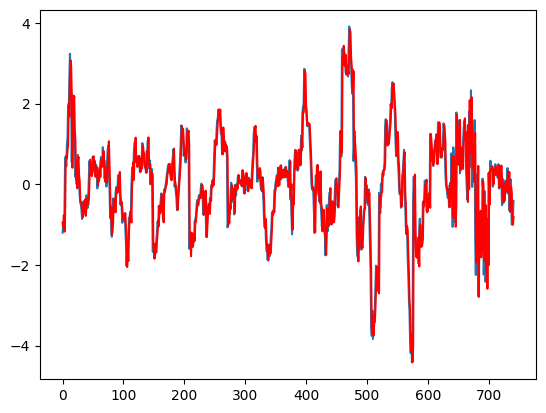

ARIMA Equation for VGSLX_P_N: y(t) = -0.0989 + (-0.0989 * y(t-1)) + (-0.0923 * y(t-2)) + (0.0946 * y(t-3)) + (-0.0515 * y(t-4)) + (0.0038 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0436
Degree-1 Coefficient: -0.3509
Degree-2 Coefficient: 0.8480
Degree-3 Coefficient: -0.5960
Degree-4 Coefficient: 0.0038
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1002.607
Date:                Fri, 14 Jul 2023   AIC                           2017.213
Time:                        16:22:46   BIC                           2051.338
Sample:                             0   HQIC                          2029.688
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err  

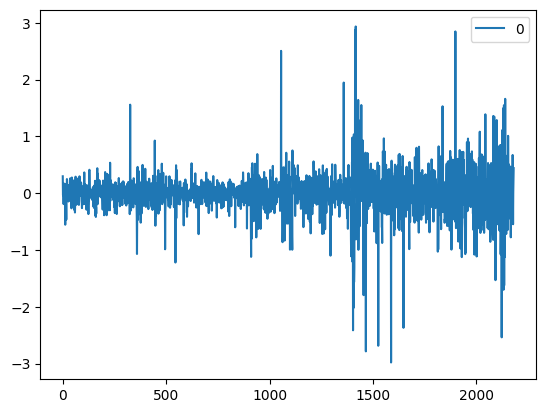

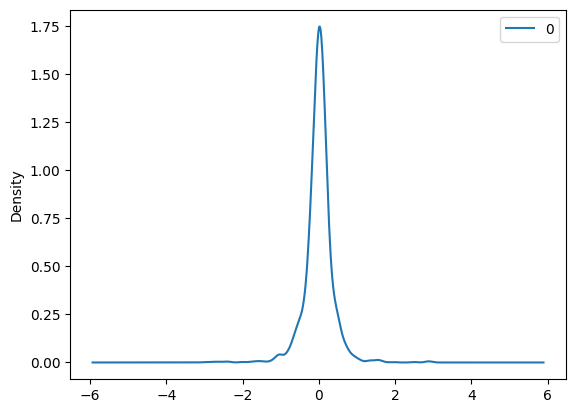

                 0
count  2182.000000
mean      0.000047
std       0.383234
min      -2.979946
25%      -0.140262
50%       0.010683
75%       0.152182
max       2.935645
predicted=-0.622074, expected=-0.737176
predicted=-0.611457, expected=-0.359842
predicted=-0.088882, expected=-0.328433
predicted=-0.422376, expected=-0.336557
predicted=-0.367096, expected=1.246571
predicted=1.199033, expected=0.997946
predicted=0.995216, expected=0.848157
predicted=1.162373, expected=0.919101
predicted=0.830400, expected=1.184421
predicted=1.037963, expected=1.999926
predicted=1.999625, expected=2.229007
predicted=2.284041, expected=3.087341
predicted=3.206363, expected=3.507504
predicted=3.515257, expected=2.909660
predicted=3.047408, expected=2.305227
predicted=2.363342, expected=0.623486
predicted=0.465871, expected=1.280855
predicted=1.124338, expected=1.717490
predicted=1.466191, expected=1.534756
predicted=1.761450, expected=1.444268
predicted=1.601814, expected=1.133048
predicted=1.058155, ex

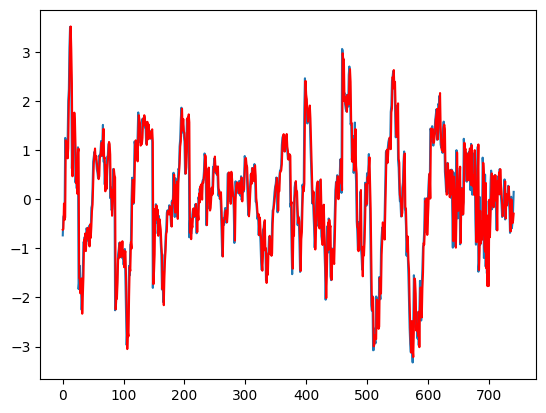

ARIMA Equation for VINAX_P_N: y(t) = -0.0741 + (-0.0741 * y(t-1)) + (-0.0877 * y(t-2)) + (0.0718 * y(t-3)) + (-0.0167 * y(t-4)) + (0.0002 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0323
Degree-1 Coefficient: -0.2524
Degree-2 Coefficient: 0.5840
Degree-3 Coefficient: -0.3807
Degree-4 Coefficient: 0.0002
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1315.124
Date:                Fri, 14 Jul 2023   AIC                           2642.248
Time:                        16:28:11   BIC                           2676.373
Sample:                             0   HQIC                          2654.723
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err  

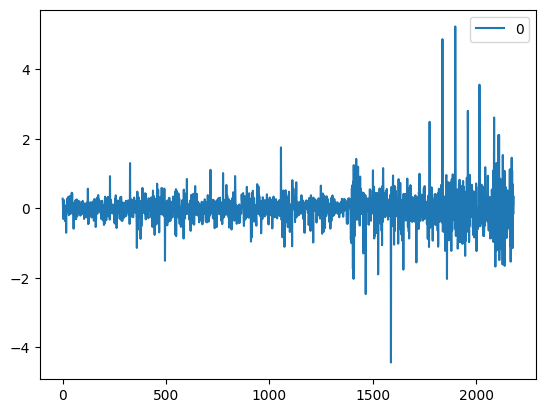

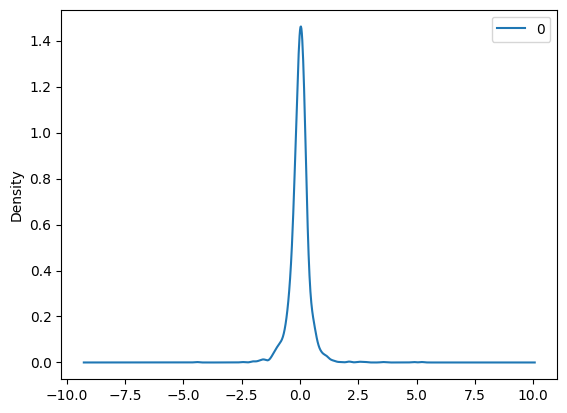

                 0
count  2182.000000
mean      0.000295
std       0.442258
min      -4.432498
25%      -0.175258
50%       0.015268
75%       0.185402
max       5.235002
predicted=0.248704, expected=0.242111
predicted=0.276386, expected=0.805331
predicted=0.853273, expected=0.683120
predicted=0.628355, expected=0.813436
predicted=0.826591, expected=1.170511
predicted=1.122022, expected=0.934921
predicted=0.938026, expected=1.116773
predicted=1.137689, expected=1.396544
predicted=1.343932, expected=1.511399
predicted=1.515127, expected=1.662330
predicted=1.674235, expected=1.483429
predicted=1.480887, expected=1.933269
predicted=1.915197, expected=2.310959
predicted=2.263760, expected=2.173287
predicted=2.211154, expected=2.040769
predicted=2.064649, expected=0.764148
predicted=0.781965, expected=1.337675
predicted=1.320640, expected=1.622599
predicted=1.514370, expected=1.613768
predicted=1.707855, expected=1.708009
predicted=1.726047, expected=1.611566
predicted=1.589218, expected=1.

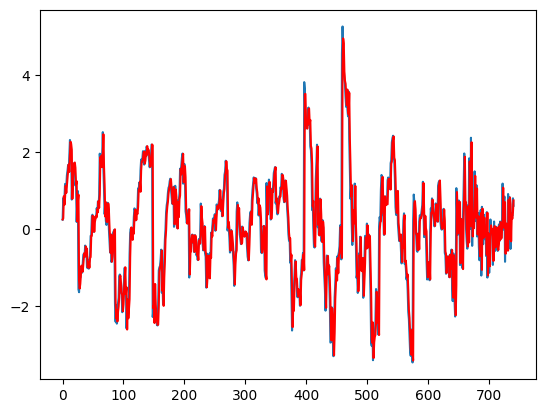

ARIMA Equation for VTCAX_P_N: y(t) = -0.1215 + (-0.1215 * y(t-1)) + (-0.0717 * y(t-2)) + (0.0253 * y(t-3)) + (-0.0519 * y(t-4)) + (-0.0318 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0206
Degree-1 Coefficient: -0.1686
Degree-2 Coefficient: 0.4106
Degree-3 Coefficient: -0.2827
Degree-4 Coefficient: -0.0318
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1216.087
Date:                Fri, 14 Jul 2023   AIC                           2444.175
Time:                        16:33:46   BIC                           2478.300
Sample:                             0   HQIC                          2456.650
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err

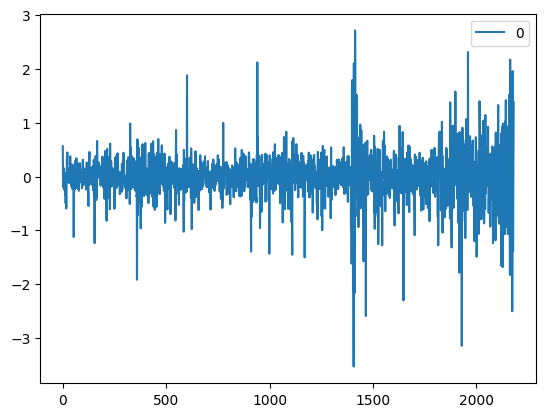

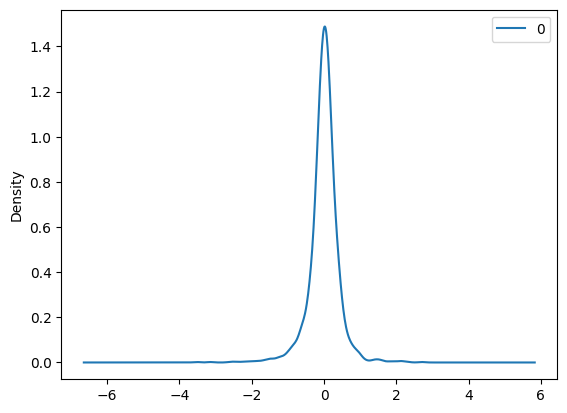

                 0
count  2182.000000
mean     -0.000198
std       0.422756
min      -3.526677
25%      -0.161423
50%       0.018127
75%       0.181474
max       2.711731
predicted=0.017562, expected=-0.633279
predicted=-0.696514, expected=-0.237400
predicted=-0.097363, expected=-0.611958
predicted=-0.715765, expected=-0.504993
predicted=-0.466888, expected=0.407890
predicted=0.381553, expected=0.580747
predicted=0.510942, expected=0.667437
predicted=0.724038, expected=0.901119
predicted=0.866586, expected=0.967534
predicted=0.912798, expected=1.054225
predicted=1.054757, expected=0.841864
predicted=0.827672, expected=1.435420
predicted=1.445788, expected=1.871849
predicted=1.802780, expected=1.466878
predicted=1.476591, expected=1.289998
predicted=1.339747, expected=-0.255422
predicted=-0.306554, expected=0.226624
predicted=0.339534, expected=0.815112
predicted=0.696378, expected=0.724399
predicted=0.774579, expected=0.892188
predicted=0.966575, expected=0.264196
predicted=0.207567, e

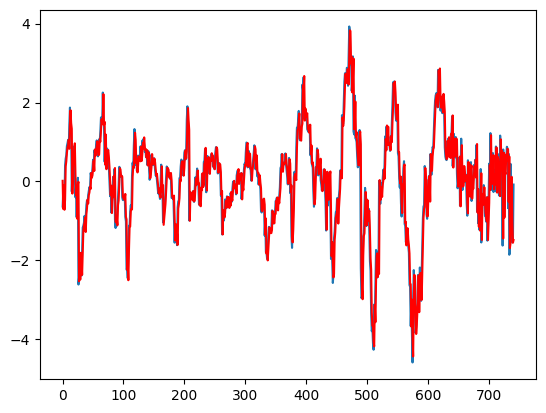

ARIMA Equation for VCSAX_P_N: y(t) = -0.1075 + (-0.1075 * y(t-1)) + (-0.0722 * y(t-2)) + (0.0281 * y(t-3)) + (-0.0531 * y(t-4)) + (-0.0106 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0230
Degree-1 Coefficient: -0.1887
Degree-2 Coefficient: 0.4670
Degree-3 Coefficient: -0.3437
Degree-4 Coefficient: -0.0106
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1119.319
Date:                Fri, 14 Jul 2023   AIC                           2250.638
Time:                        16:39:28   BIC                           2284.764
Sample:                             0   HQIC                          2263.114
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err

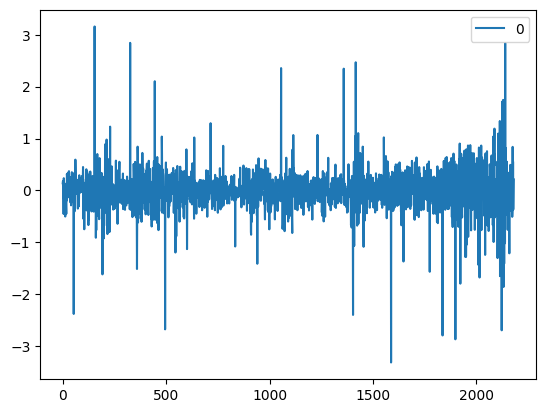

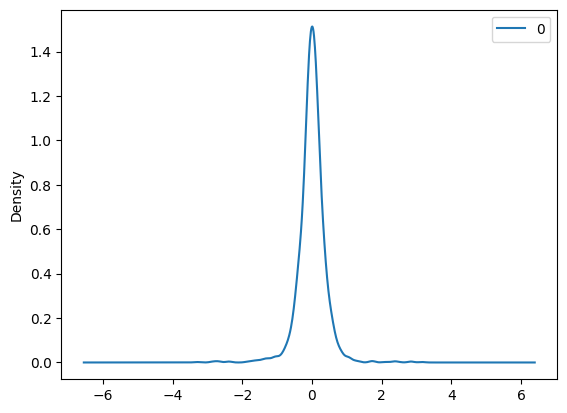

                 0
count  2182.000000
mean     -0.000318
std       0.404259
min      -3.312418
25%      -0.162195
50%       0.005738
75%       0.174831
max       3.158981
predicted=0.314106, expected=0.053841
predicted=0.060815, expected=0.424367
predicted=0.419598, expected=0.287631
predicted=0.279866, expected=0.237317
predicted=0.243947, expected=0.637902
predicted=0.624302, expected=0.354624
predicted=0.361912, expected=0.326856
predicted=0.330226, expected=0.490719
predicted=0.480687, expected=0.774822
predicted=0.773370, expected=1.081470
predicted=1.074996, expected=1.110064
predicted=1.107709, expected=1.939004
predicted=1.922157, expected=2.538736
predicted=2.526168, expected=2.052553
predicted=2.065321, expected=1.472433
predicted=1.476342, expected=0.433899
predicted=0.439322, expected=0.755578
predicted=0.764650, expected=1.035923
predicted=1.039590, expected=0.677495
predicted=0.694725, expected=0.792511
predicted=0.782713, expected=0.546808
predicted=0.546971, expected=-0

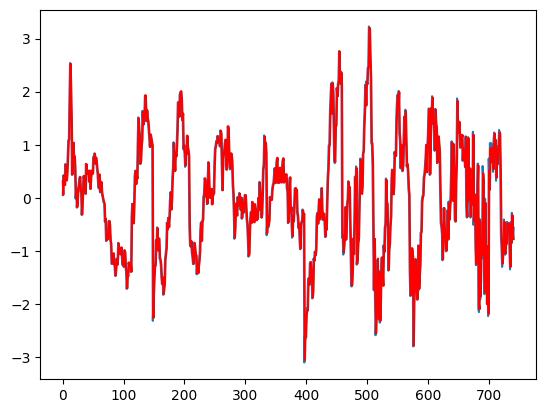

ARIMA Equation for VENAX_P_N: y(t) = -0.0923 + (-0.0923 * y(t-1)) + (-0.0238 * y(t-2)) + (-0.0174 * y(t-3)) + (-0.0097 * y(t-4)) + (-0.0225 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: -0.0036
Degree-1 Coefficient: 0.0250
Degree-2 Coefficient: -0.0603
Degree-3 Coefficient: 0.0517
Degree-4 Coefficient: -0.0225
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1224.980
Date:                Fri, 14 Jul 2023   AIC                           2461.961
Time:                        16:44:48   BIC                           2496.086
Sample:                             0   HQIC                          2474.436
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std er

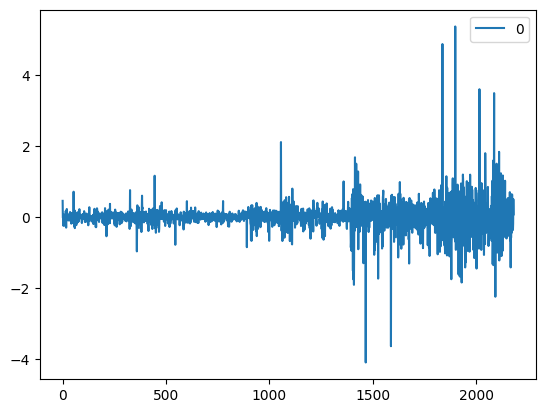

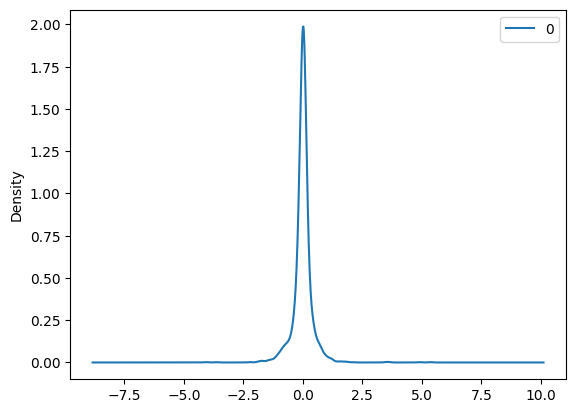

                 0
count  2182.000000
mean      0.000124
std       0.424425
min      -4.098394
25%      -0.115726
50%       0.011468
75%       0.126629
max       5.372918
predicted=0.097797, expected=0.107103
predicted=0.202184, expected=0.392895
predicted=0.493911, expected=0.445819
predicted=0.381907, expected=0.445819
predicted=0.436101, expected=1.085148
predicted=1.050502, expected=0.795120
predicted=0.810466, expected=0.939074
predicted=0.999170, expected=1.195229
predicted=1.118177, expected=1.389991
predicted=1.392196, expected=1.855727
predicted=1.875064, expected=1.781632
predicted=1.803039, expected=2.317229
predicted=2.328179, expected=2.717339
predicted=2.677232, expected=2.478119
predicted=2.554801, expected=2.306642
predicted=2.333520, expected=1.036450
predicted=1.009404, expected=1.546643
predicted=1.464056, expected=1.972157
predicted=1.836385, expected=1.891710
predicted=2.040278, expected=1.815498
predicted=1.873171, expected=1.813381
predicted=1.765907, expected=1.

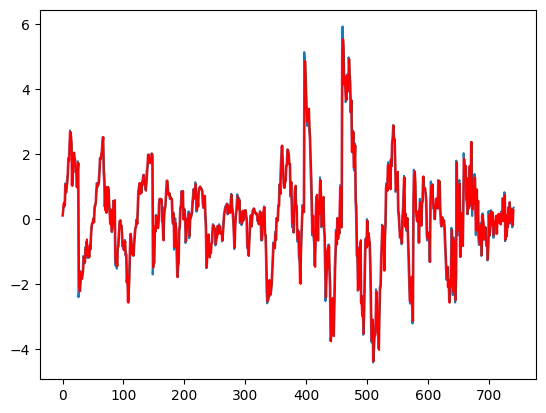

ARIMA Equation for VCDAX_P_N: y(t) = -0.0623 + (-0.0623 * y(t-1)) + (-0.1070 * y(t-2)) + (0.0132 * y(t-3)) + (-0.0193 * y(t-4)) + (0.0149 * y(t-5)) + e(t)
Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0224
Degree-1 Coefficient: -0.1708
Degree-2 Coefficient: 0.3891
Degree-3 Coefficient: -0.2748
Degree-4 Coefficient: 0.0149


In [ ]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# Iterate over columns
for column in columns_important_P:
    # Load dataset for the current column
    series = data[column].tolist()

    # Fit model
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit()

    # Print summary of fit model
    print(model_fit.summary())

    # Line plot of residuals
    residuals = DataFrame(model_fit.resid)
    residuals.plot()
    pyplot.show()

    # Density plot of residuals
    residuals.plot(kind='kde')
    pyplot.show()

    # Summary stats of residuals
    print(residuals.describe())

    # Evaluate ARIMA model using walk-forward validation
    X = series
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

    # Evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

    # Plot forecasts against actual outcomes
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

    # Get the coefficients of the AR and MA terms
    ar_params = model_fit.arparams
    ma_params = model_fit.maparams

    # Get the constant term
    const_param = model_fit.params[0]

    # Print the equation
    print(f"ARIMA Equation for {column}: y(t) = {const_param:.4f} + ", end="")
    for i in range(len(ar_params)):
        print(f"({ar_params[i]:.4f} * y(t-{i+1})) + ", end="")
    for i in range(len(ma_params)):
        print(f"({ma_params[i]:.4f} * e(t-{i+1})) + ", end="")
    print("e(t)")

    import numpy as np

    # Assuming you have obtained the ARIMA equation coefficients
    ar_coefs = [ar_params[i] for i in range(len(ar_params))]
    ma_coefs = [ma_params[i] for i in range(len(ma_params))]

    # Concatenate the AR and MA coefficients in reverse order
    coefs = np.concatenate((ma_coefs[::-1], ar_coefs[::-1]))

    # Determine the degree of the Taylor polynomial
    degree = len(coefs) - 1

    # Fit a polynomial to the coefficients using polyfit
    poly_coefs = np.polyfit(range(degree + 1), coefs, degree)

    # Print the Taylor polynomial coefficients
    print("Taylor Polynomial Coefficients:")
    for i, coef in enumerate(poly_coefs):
        print(f"Degree-{i} Coefficient: {coef:.4f}")